In [1]:
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# [Intro](http://)

**we are going to see a Regression Problam this Dataset has 80+ columns and 1000+ rows which is huge dataset
it is going Fun, please let me know your Ideas in the comment**
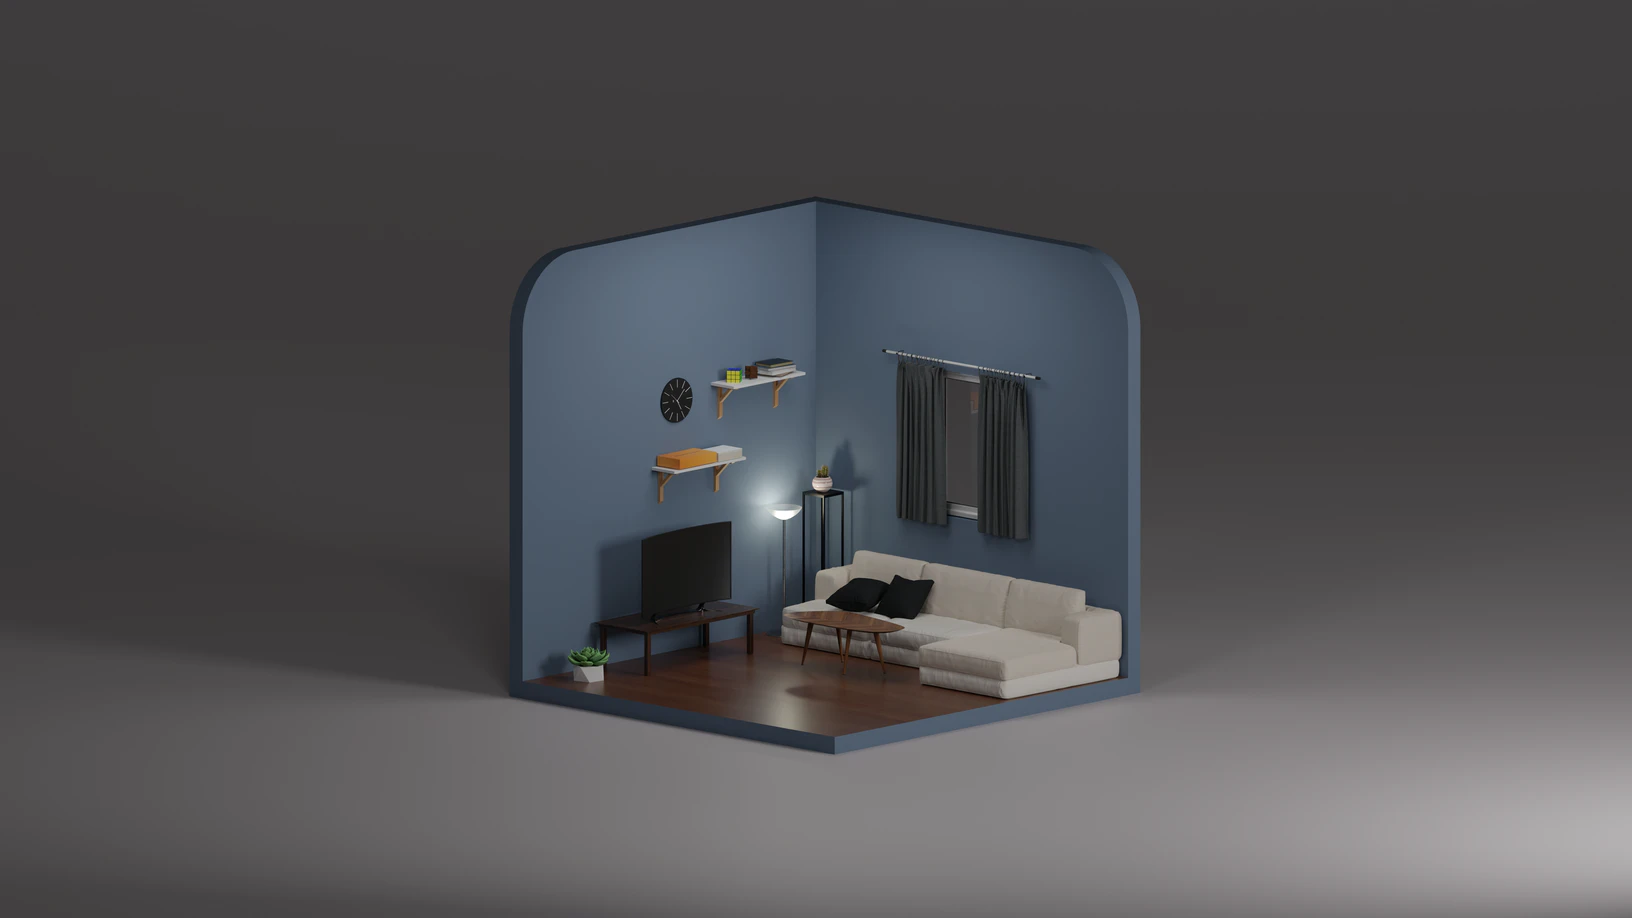

**import needed libraries  to work with Data**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
%matplotlib inline

In [3]:
pd.set_option('display.max_columns',None) # get to see  the full coloum with this pd.set_option

**Read the Train and Test Dataset**

In [4]:
train_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [5]:
train_df.head() #read the top 5 records by defalt 

In [6]:
print('shape of train data',':',train_df.shape)
print('shape of test data',':',test_df.shape)

In [7]:
#info of train data
train_df.info()

**look for the null values in the Train data set**

In [8]:
def missing_percent_of_column(train_set):
    nan_percent = 100*(train_set.isnull().sum()/len(train_set))
    nan_percent = nan_percent[nan_percent>0].sort_values(ascending=False).round(1)
    DataFrame = pd.DataFrame(nan_percent)
    mis_percent_table = DataFrame.rename(columns = {0 : '% of Misiing Values'}) 
    mis_percent = mis_percent_table
    return mis_percent

In [9]:
missing_value = missing_percent_of_column(train_df)
missing_value

In [10]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)
#sometimes you can't isnull().sum() for a Large dataset

droping some coloums

In [11]:
train_df.drop(columns=['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)
test_df.drop(columns=['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

**right now we have removed coloumns that have more than 80% of missing data** 🐣

In [12]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

# **[EDA](http://)**

# [ categorical Value](http://)

In [13]:
categorical_var =train_df.select_dtypes('object')

In [14]:
for i in categorical_var:
    print("{:30s} {:4.1f}  {}".format(i,len(train_df[i].unique()),'unique value'))

**If you  look at the  Exterior1st,Exterior2nd and Neighborhood  coloumns it as more then 9 unique values** 🦕

In [15]:
for feature in categorical_var:
    data=train_df.copy()
    c = ['#FF6B6B','#FFD93D','#6BCB77','#4D96FF']
    data.groupby(feature)['SalePrice'].median().plot.bar(color = c)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

#  **[Numrical Value](http://)**

In [16]:
numicarl_value = train_df.select_dtypes( np.number)

In [17]:
numicarl_value

**year varable**

In [18]:
year_var = [x for x in numicarl_value.columns if 'Yr'in x or  'Year' in x]

In [19]:
train_df[year_var]

In [20]:
for f in year_var:
    print(f,data[f].unique())

In [21]:
sns.lineplot(data=data, x="YrSold", y="SalePrice")


**# 1 in this obersavtion there is a price fall**

In [22]:
sns.scatterplot(data=data, x='YearBuilt', y='SalePrice')

In [23]:
sns.scatterplot(data=data, x='YearRemodAdd', y='SalePrice', )

In [24]:
sns.scatterplot(data=data, x='GarageYrBlt', y='SalePrice')

**#2 nd plot**

In [25]:
for feature in year_var:
    if feature!='YrSold':
        data=train_df.copy()
        
        sns.set_theme(style="darkgrid")
        
        data[feature]=data['YrSold']-data[feature]
        
        sns.relplot( x=data[feature], y= data['SalePrice'])

**#the 1 and 2 are showing same relation between saleprice with other year features do't confuce both**

# Discreat value

In [26]:
discreat_value=[i for i in numicarl_value if len(train_df[i].unique())<25 and i not in year_var + ['id']]

In [27]:
discreat_value

**this  are colume that have unique value less that 25 which are in numicarl value that are not inclued year cloloms and id**

In [28]:
for i in discreat_value:
    dataset = train_df.copy()
    sns.set_theme(style="whitegrid")
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    sns.catplot(data=dataset,x=i,y='SalePrice',kind='bar',ci=None)

# **contunes varable**

In [29]:
contunes_varable =[x for x in numicarl_value if x not in discreat_value and x not in year_var + ['Id'] ]


In [30]:
len(contunes_varable)


In [31]:
for i in contunes_varable:
    dataest = train_df.copy()
    sns.displot(dataset, x=dataest[i])

if you look the sone colomes thy not in normally  disubation 🛶

In [32]:
for feature in contunes_varable:
    data=train_df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature, patch_artist=False)        
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()



**i try droping FireplaceQu  but it show Error is complaining that some the column after serching on google**
https://stackoverflow.com/questions/57762244/what-is-the-best-way-to-implement-pipeline-to-make-sure-train-and-test-dummy-var
**this help me to reslove the error**

In [33]:
drop_columns = ['FireplaceQu']
drop_columns = set(drop_columns)

In [34]:
train_df.drop(columns=drop_columns, inplace=True)


In [35]:
test_df.drop(columns=drop_columns, inplace=True)


In [36]:
train_df

# **Handle Missing Data in Categorical**

In [37]:
df_Train_categorical_NaN_Value =[x for x in train_df.columns if train_df[x].isnull().sum()>1 and train_df[x].dtypes=='O']


In [38]:
train_df[df_Train_categorical_NaN_Value]

**missing categorical in train and it's count**

In [39]:
train_df[df_Train_categorical_NaN_Value].isnull().sum() 

In [40]:
df_Test_categorical_NaN_Value =[i for i in test_df.columns if test_df[i].isnull().sum()>1 and test_df[i].dtypes=='O']

**missing categorical in test and it's count**

In [41]:
test_df[df_Test_categorical_NaN_Value].isnull().sum()

**replcing NaN for train**

In [42]:
def catcorcal_value_replace(data,feature_nan):
    data = train_df.copy()
    data[feature_nan] = data[feature_nan].fillna('missing')
    return data

In [43]:
train_df=catcorcal_value_replace(train_df,df_Train_categorical_NaN_Value)

In [44]:
train_df[df_Train_categorical_NaN_Value].isnull().sum() 

**replcing NaN for test**

In [45]:
def catcorcal_value_replace(data,feature_nan):
    data = train_df.copy()
    data[feature_nan] = data[feature_nan].fillna('missing')
    return data

In [46]:
test_df=catcorcal_value_replace(test_df,df_Test_categorical_NaN_Value)

In [47]:
train_df[df_Train_categorical_NaN_Value].isnull().sum() 

# **Handle Missing Data in Numerical**

In [48]:
train_df.drop(columns=['LotFrontage'],inplace=True)

In [49]:
test_df.drop(columns=['LotFrontage'],inplace=True)

In [50]:
df_test_Numerical_value_NaN = [y for y in test_df.columns if test_df[y].isnull().sum()>1 and test_df[y].dtypes!='O']
df_train_Numerical_value_NaN = [u for u in train_df.columns if train_df[u].isnull().sum()>1 and test_df[u].dtypes!='O']

In [51]:
for i in df_test_Numerical_value_NaN:
    print(i,':',train_df[i].isnull().sum())
print(train_df.shape[0])

In [52]:
for i in df_test_Numerical_value_NaN:
    print(i,':',train_df[i].isnull().sum())
print(train_df.shape[0])

In [53]:
df_test_Numerical_value_NaN

In [54]:
df_train_Numerical_value_NaN

In [55]:
#replacing the num valiue in train data 
for n in df_train_Numerical_value_NaN:
    median = train_df[n].median()
    
    train_df[n+'nan'] =np.where(train_df[n].isnull(),1,0)
    train_df[n].fillna(median,inplace=True)

In [56]:
train_df[df_train_Numerical_value_NaN].isnull().sum()

In [57]:
#replacing the num valiue in train data 
for n in df_test_Numerical_value_NaN:
    median = test_df[n].median()
    
    test_df[n+'nan'] =np.where(test_df[n].isnull(),1,0)
    test_df[n].fillna(median,inplace=True)

In [58]:
test_df[df_test_Numerical_value_NaN].isnull().sum()

In [59]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

In [60]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False)

In [61]:
#year in train
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    train_df[feature]=train_df['YrSold']-train_df[feature]

In [62]:
# year in test
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    test_df[feature]=test_df['YrSold']-test_df[feature]

In [63]:
test_df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()


In [64]:
test_df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()


In [65]:
#log in 
num_features=[ 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

In [66]:
train_df['LotArea']= np.log(train_df['LotArea'])
test_df['LotArea']= np.log(test_df['LotArea'])

In [67]:
train_df['1stFlrSF']= np.log(train_df['1stFlrSF'])
test_df['1stFlrSF']= np.log(test_df['1stFlrSF'])

In [68]:
train_df['GrLivArea']= np.log(train_df['GrLivArea'])
test_df['GrLivArea']= np.log(test_df['GrLivArea'])

In [69]:
train_df['SalePrice']= np.log(train_df['SalePrice'])

In [70]:
 for i in contunes_varable:
        try:
            dataest = train_df.copy()
            sns.displot(dataset, x=dataest[i])
        except KeyError :
                print('no')


In [71]:
import scipy.stats as stat
import pylab 

In [72]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [73]:
for i in contunes_varable:
    try:
        plot_data(train_df,i)
        plt.title(i)
    except KeyError :
                print('no')

In [74]:
train_df.EnclosedPorch

In [75]:
plot_data(train_df,'1stFlrSF')

In [76]:
train_df['1stFlrSF']

In [77]:
train_df.MasVnrArea

In [78]:
saleprice_scaled = StandardScaler().fit_transform(train_df['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

In [79]:
train_df.GrLivArea

In [80]:
for i in categorical_var:
    try:

        frequencies = train_df[i].value_counts(normalize=True, ascending=True)
        threshold = frequencies[(frequencies.cumsum() > 0.1).idxmax()]
    except KeyError :
                print('no')

In [81]:
train_df[i].mask(train_df[i].map(train_df[i].value_counts(normalize=True)) < 0.01, 'Other')


In [82]:
train_df.shape

In [83]:
data.SalePrice

In [84]:
#train data set
from sklearn import preprocessing
for i in categorical_var:
    try:
        label_encoder = preprocessing.LabelEncoder()
        train_df[i]= label_encoder.fit_transform(train_df[i])
    except KeyError :
                print('no')

In [85]:
train_df

In [86]:
for j in categorical_var:
    try:
        label_encoder = preprocessing.LabelEncoder()
        test_df[j]= label_encoder.fit_transform(test_df[j])
    except KeyError :
                print('no')

In [87]:
test_df

feature Scaleing in Traing set

In [88]:
feature_scale=[feature for feature in train_df.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_df[feature_scale])

In [89]:
scaler.transform(train_df[feature_scale])


In [90]:
train_df = pd.concat([train_df[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(train_df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [91]:
train_df

feature Scaling for Test DATA

In [92]:
#test
feature_scale=[feature for feature in test_df.columns if feature not in ['Id']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(test_df[feature_scale])

In [93]:
scaler.transform(test_df[feature_scale])


In [94]:
test_df = pd.concat([test_df[['Id']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(test_df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [95]:
test_df

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
from sklearn.linear_model import Ridge,Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

In [98]:
train_df.drop(labels=['Id'],axis=1,inplace=True)

In [99]:
test_df.drop(labels=['Id'],axis=1,inplace=True)

In [100]:
train_df

In [101]:
from sklearn.feature_selection import SelectFromModel

In [102]:
y=train_df.SalePrice
x= train_df.iloc[:,1:]

In [103]:
x

In [104]:
#train
plt.figure(figsize=(22,18))
ax = sns.heatmap(x.corr(), annot=True)
plt.show()

In [105]:
#test
plt.figure(figsize=(22,18))
ax = sns.heatmap(test_df.corr(), annot=True)
plt.show()

In [106]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [110]:
corr_features_train= correlation(x, 0.64)
len(set(corr_features_train))

In [111]:
corr_features_test = correlation(test_df, 0.64)
len(set(corr_features_test))

In [112]:
len(corr_features_train)

In [113]:
x =  x.drop(corr_features_train,axis=1)

In [114]:
test_df =   test_df.drop(corr_features_test,axis=1)

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

In [116]:
x_train

**Prediciton and selecting the Algorithm**

In [117]:
from sklearn.linear_model import  Lasso, Ridge, LassoCV,LinearRegression


In [118]:
liner_reg= LinearRegression()
liner_reg.fit(x_train,y_train)

In [119]:
liner_reg.score(x_train,y_train)

In [120]:
Pred = liner_reg.predict(test_df)

In [130]:
Pred

In [123]:
y_test

In [127]:
x_test

In [131]:
liner_reg.score(x_test,y_test)

In [132]:
final = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [133]:
final

In [135]:
pred = pd.DataFrame(Pred,columns=['SalePrice'])
sub = pd.concat([final['Id'],pred],axis=1)

sub.set_index('Id',inplace=True)

sub.to_csv("submission.csv")

In [136]:
submission = pd.read_csv("submission.csv")
submission.head()